In [1]:
from sklearn import manifold, datasets
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

data = pd.read_csv("../../../3ormoreDATLOW.csv",index_col=0)
data.loc[data['class'] == 2.0, 'class'] = -1.0 #consider CIMP-Low to be with negative class
data.insert(0,column='0',value=data.iloc[:,-1].tolist()) #move classification to front

#one data set will have only foreground
datapos = data[data['0'] == 1.0]
data = data.drop(columns=['class']) #this column has been moved
datapos = datapos.drop(columns=['class'])

#number cols/indices to make easier to index
data.columns = range(0,data.shape[1])
data.index = range(0,data.shape[0])
datapos.columns = range(0,datapos.shape[1])
datapos.index = range(0,datapos.shape[0])

data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
4,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,-1.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
9,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Random jitter and creating MDS

### The random jitter function is used to add small variance to points in a given array, so that overlapping data points are more clear when plotting

In [2]:
# below function takes a list of floats and adds small variance to the points
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# make MDS for all data
my_scaler = manifold.SpectralEmbedding(n_jobs=-1)
my_new_data = my_scaler.fit_transform(data[data.columns[1:]])

# make MDS for just positive samples
my_scalerPos = manifold.SpectralEmbedding(n_jobs=-1)
my_new_dataPos = my_scaler.fit_transform(datapos[datapos.columns[1:]])


my_new_data

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([[ -4.14355138e-01,  -6.30583669e-01],
       [ -2.09749709e-01,   9.57551162e-01],
       [ -4.18100906e-01,  -6.14213771e-01],
       [ -1.27212813e-01,   5.63284423e-01],
       [ -4.18100906e-01,  -6.14213771e-01],
       [ -4.14355138e-01,  -6.30583669e-01],
       [ -4.18100906e-01,  -6.14213771e-01],
       [ -4.18100906e-01,  -6.14213771e-01],
       [  5.26088218e-01,   8.50478781e-02],
       [ -4.18100906e-01,  -6.14213771e-01],
       [ -4.18100906e-01,  -6.14213771e-01],
       [ -1.17621469e-01,   5.04921674e-01],
       [ -4.18100906e-01,  -6.14213771e-01],
       [ -5.00008637e-02,   1.58148461e-02],
       [  1.26748833e-01,  -5.37779897e-01],
       [  1.26748833e-01,  -5.37779897e-01],
       [  9.85135766e-02,  -5.42837595e-01],
       [  1.26748833e-01,  -5.37779897e-01],
       [  1.26748833e-01,  -5.37779897e-01],
       [ -1.28800449e-01,   5.64012559e-01],
       [  1.26748833e-01,  -5.37779897e-01],
       [ -9.38486447e-02,   1.66798812e-01],
       [ -

# Plot data of positive and negative classes

Text(0,0.5,'Second Dimension')

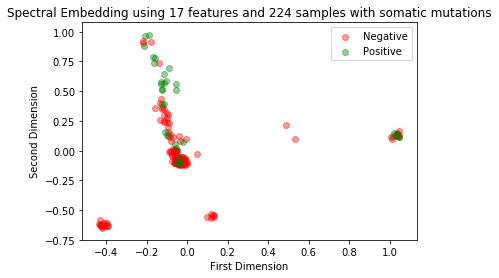

In [3]:
colors =['red','green'] 

plt.figure() #init plot
for color, i, target_name in zip(colors, [-1,1], ["Negative","Positive"]):
    #plot the points at 0th (x) and 1st (y) elements across 2d array of point coords
    plt.scatter(rand_jitter(my_new_data[data[0] == i, 0]), rand_jitter(my_new_data[data[0] == i, 1]), color=color, alpha=.4, lw=1, label=target_name)

#set up legend, title, axis labels
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("Spectral Embedding using 17 features and 224 samples with somatic mutations")
plt.xlabel("First Dimension")
plt.ylabel("Second Dimension")

# Plotting positive samples (CIMP-High only)

Text(0,0.5,'Second Dimension')

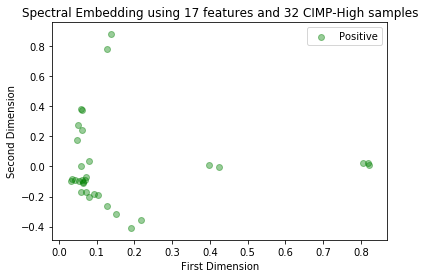

In [4]:
#same as before, copy/paste w some bits deleted to work for only one class

colors =['green']

plt.figure()
for color, i, target_name in zip(colors, [1], ["Positive"]):
    #note I use my_new_dataPos here instead of my_new_data. This contains the data w/ only cimp-high.
    plt.scatter(rand_jitter(my_new_dataPos[datapos[0] == i, 0]), rand_jitter(my_new_dataPos[datapos[0] == i, 1]), color=color, alpha=.4, lw=1, label=target_name)

#set up legend, title, axis labels
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("Spectral Embedding using 17 features and 32 CIMP-High samples")
plt.xlabel("First Dimension")
plt.ylabel("Second Dimension")

# Create 3D MDS models

In [5]:
# make 3D MDS for all data
my_scaler = manifold.SpectralEmbedding(n_jobs=-1, n_components=3) # note here: n_components=3
my_new_data = my_scaler.fit_transform(data[data.columns[1:]])

# make 3D MDS for just positive samples
my_scalerPos = manifold.SpectralEmbedding(n_jobs=-1, n_components=3)
my_new_dataPos = my_scaler.fit_transform(datapos[datapos.columns[1:]])


my_new_dataPos

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([[ -3.53686951e-01,  -4.07697173e-01,  -7.12845170e-01],
       [ -1.17895650e-01,  -1.46782640e-01,  -2.69829956e-01],
       [ -1.17895650e-01,  -1.41931177e-01,  -2.35605991e-01],
       [ -7.85971003e-02,  -8.34605934e-02,   2.64696341e-02],
       [ -1.57194201e-01,  -1.94074662e-01,  -3.61474198e-01],
       [ -1.57194201e-01,  -1.81398027e-01,  -2.28956772e-01],
       [ -2.35791301e-01,  -2.64291093e-01,  -4.52957646e-01],
       [ -1.17895650e-01,   3.90798714e-01,  -2.51272455e-02],
       [ -2.35791301e-01,   7.79866564e-01,  -4.99834823e-02],
       [ -1.17895650e-01,   2.39464944e-01,  -2.70626566e-03],
       [ -1.17895650e-01,  -9.93079054e-02,  -1.75765475e-01],
       [ -2.75089851e-01,   8.70522761e-01,  -5.23805882e-02],
       [ -3.92985502e-01,  -3.67265933e-01,   8.26731604e-01],
       [ -1.17895650e-01,  -6.62022503e-02,   1.79764948e-01],
       [  7.03688818e-01,   2.32678485e-14,  -4.51896231e-15],
       [ -7.85971003e-02,   2.58628435e-01,  -1.6457445

# Plot 3D MDS with all classes

Text(0.5,0.92,'Spectral Embedding - Using 17 Features with 3 or more CIMP-High')

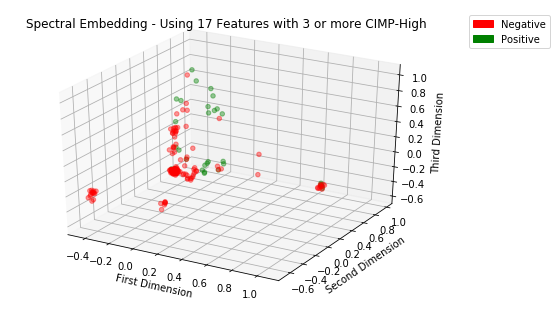

In [6]:
fig = plt.figure()
ax = Axes3D(fig)

colors =['red','green']

for color, i, target_name in zip(colors, [-1,1], ["Negative","Positive"]):
    #the different thing here is that we plot a z coordinate: my_new_data[data[0] == i, 2]
    ax.scatter(rand_jitter(my_new_data[data[0] == i, 0]), rand_jitter(my_new_data[data[0] == i, 1]), rand_jitter(my_new_data[data[0] == i, 2]), color=color, alpha=.4, lw=1, label="target_name")    

#mpatches is just a manual way of setting the legend. here I make 2 entries, one red and one green
mypatches = [mpatches.Patch(color='red', label='Negative'), mpatches.Patch(color='green', label='Positive')]
ax.legend(handles=mypatches, bbox_to_anchor=(1.05, 1), loc=2)

#again, set axes labels and title
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')
ax.set_title("Spectral Embedding - Using 17 Features with 3 or more CIMP-High")

# Plot 3D MDS of only positive class

Text(0.5,0.92,'Spectral Embedding - Using 17 Features with 3 or more CIMP-High')

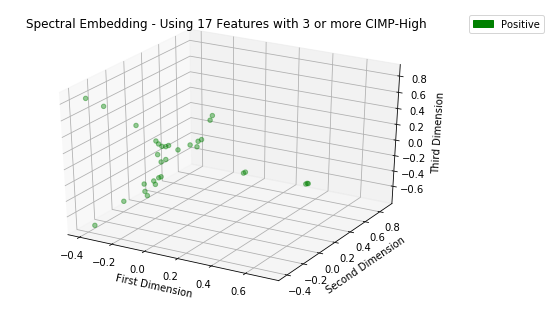

In [7]:
fig = plt.figure()
ax = Axes3D(fig)

colors =['green']

for color, i, target_name in zip(colors, [1], ["Positive"]):
    ax.scatter(rand_jitter(my_new_dataPos[datapos[0] == i, 0]), rand_jitter(my_new_dataPos[datapos[0] == i, 1]), rand_jitter(my_new_dataPos[datapos[0] == i, 2]), color=color, alpha=.4, lw=1, label="target_name")    

mypatches = [mpatches.Patch(color='green', label='Positive')]
ax.legend(handles=mypatches, bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')
ax.set_title("Spectral Embedding - Using 17 Features with 3 or more CIMP-High")